<a href="https://colab.research.google.com/github/mkrzywda/cars/blob/master/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_hdf('/content/drive/My Drive/car.h5')
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106494 entries, 0 to 160615
Columns: 155 entries, breadcrumb to car_id
dtypes: bool(70), float64(1), int64(1), object(83)
memory usage: 77.0+ MB


(106494, 155)

In [8]:
df.columns.values

array(['breadcrumb', 'created_at', 'price_currency', 'price_details',
       'price_value', 'seller_address', 'seller_name', 'seller_type',
       'feature_czujniki-parkowania-przednie',
       'feature_poduszka-powietrzna-chroniąca-kolana',
       'feature_kurtyny-powietrzne', 'feature_klimatyzacja-dwustrefowa',
       'feature_światła-led', 'feature_czujnik-zmierzchu',
       'feature_elektrycznie-ustawiane-lusterka',
       'feature_asr-(kontrola-trakcji)',
       'feature_poduszka-powietrzna-kierowcy', 'feature_cd',
       'feature_elektryczne-szyby-przednie',
       'feature_poduszka-powietrzna-pasażera',
       'feature_system-start-stop', 'feature_światła-do-jazdy-dziennej',
       'feature_komputer-pokładowy', 'feature_elektryczne-szyby-tylne',
       'feature_klimatyzacja-manualna', 'feature_tapicerka-welurowa',
       'feature_czujnik-deszczu', 'feature_światła-przeciwmgielne',
       'feature_ogrzewanie-postojowe', 'feature_radio-niefabryczne',
       'feature_regulowane-zaw

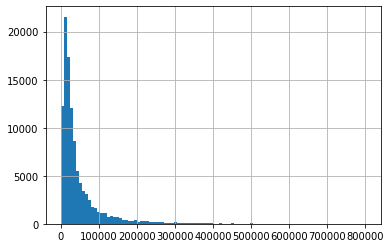

In [9]:
df['price_value'].hist(bins=100)

In [10]:
df['price_value'].describe()

count    106494.000000
mean      47534.137437
std       66308.716918
min         400.000000
25%       13890.000000
50%       25500.000000
75%       52900.000000
max      799900.000000
Name: price_value, dtype: float64

In [11]:
df['param_marka-pojazdu'].unique()

array(['Dacia', 'Peugeot', 'Porsche', 'Volkswagen', 'Škoda', 'Jeep',
       'Renault', 'Opel', 'Volvo', 'Audi', 'BMW', 'Toyota', 'Kia',
       'Hyundai', 'Citroën', 'Nissan', 'Daewoo', 'Fiat', 'Mercedes-Benz',
       'Mini', 'Ford', 'Chevrolet', 'Infiniti', 'Suzuki', 'Lexus', 'Seat',
       'Mitsubishi', 'SsangYong', 'Mazda', 'Alfa Romeo', 'Saab', 'Dodge',
       'Jaguar', 'Honda', 'Smart', 'Land Rover', 'Chrysler',
       'Aston Martin', 'Subaru', 'Piaggio', 'Daihatsu', 'Cadillac',
       'Lada', 'Iveco', 'Lincoln', 'Inny', 'Lancia', 'Yugo', 'Pontiac',
       'MG', 'Scion', None, 'Hummer', 'Polonez', 'Maybach', 'Maserati',
       'Aixam', 'Bentley', 'Lamborghini', 'Isuzu', 'Gaz', 'Rover',
       'Wartburg', 'Mercury', 'Ferrari', 'Oldsmobile', 'Rolls-Royce',
       'Moskwicz', 'Ligier', 'Vauxhall', 'Tesla', 'Microcar', 'Acura',
       'Buick', 'Tarpan', 'Uaz', 'McLaren', 'GMC', 'Warszawa', 'Morgan',
       'Żuk', 'Tata', 'Brilliance', 'Triumph', 'Chatenet', 'Zastava',
       'Wołga', '

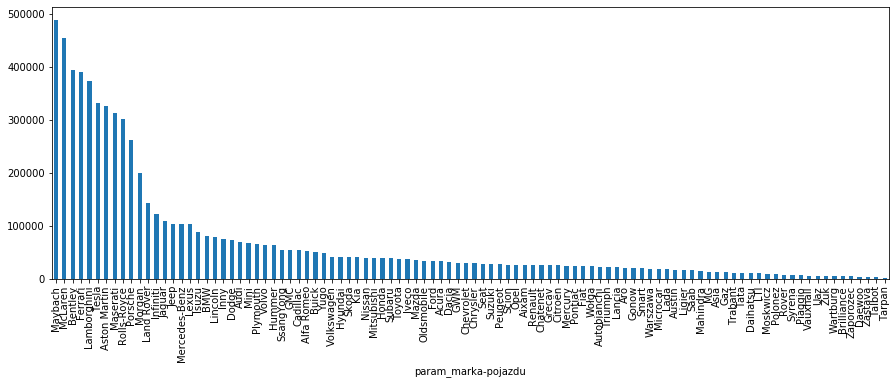

In [14]:
(df.groupby('param_marka-pojazdu')['price_value']
      .agg(np.mean)
      .sort_values(ascending=False)
).plot(kind='bar', figsize=(15,5))

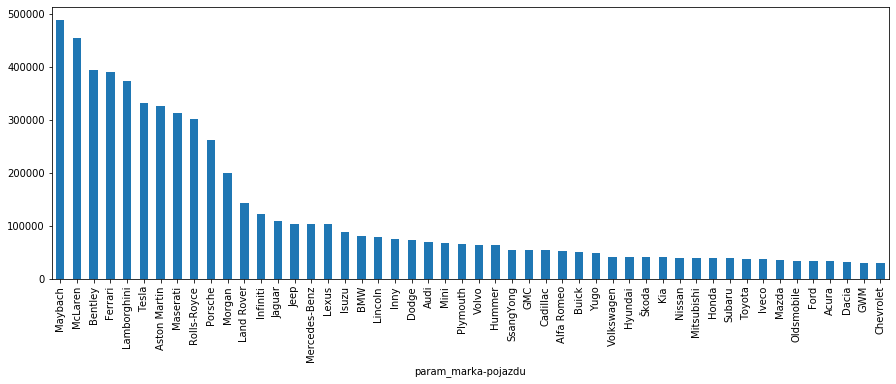

In [15]:
(df.groupby('param_marka-pojazdu')['price_value']
      .agg(np.mean)
      .sort_values(ascending=False)
      .head(50)
).plot(kind='bar', figsize=(15,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f93565d3438>,
      dtype=object)

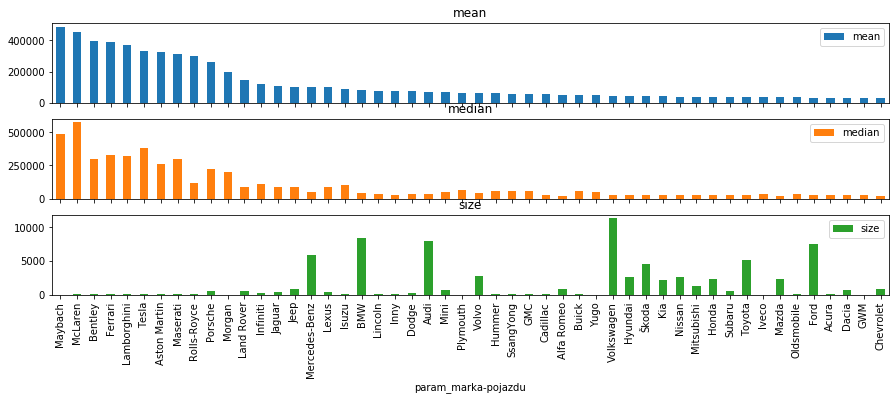

In [16]:
(df.groupby('param_marka-pojazdu')['price_value']
      .agg([np.mean, np.median, np.size])
      .sort_values(by='mean', ascending=False)
      .head(50)
).plot(kind='bar', figsize=(15,5), subplots=True)

In [0]:
def group_and_barplot(feat_groupby, feat_agg='price_value', agg_func=[np.mean, np.median, np.size], feat_sort='mean', top=50, subplots=True):
  return(
    df.groupby(feat_groupby)[feat_agg]
      .agg(agg_func)
      .sort_values(by=feat_sort, ascending=False)
      .head(top)
    ).plot(kind='bar', figsize=(15,5), subplots=subplots)

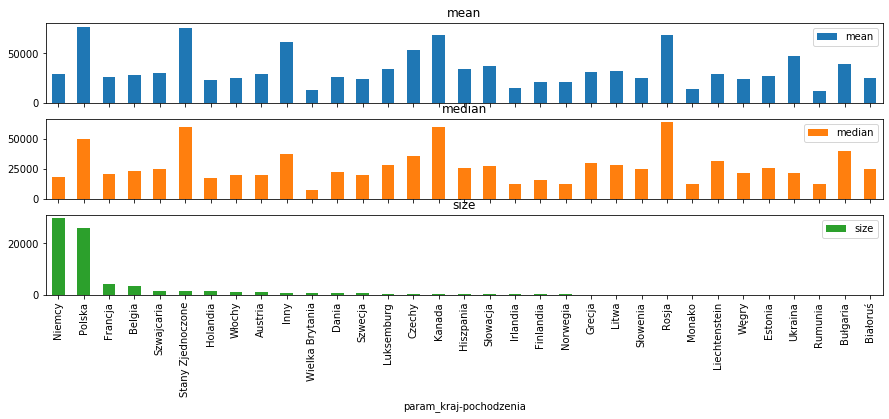

In [18]:
group_and_barplot('param_kraj-pochodzenia', feat_sort='size');

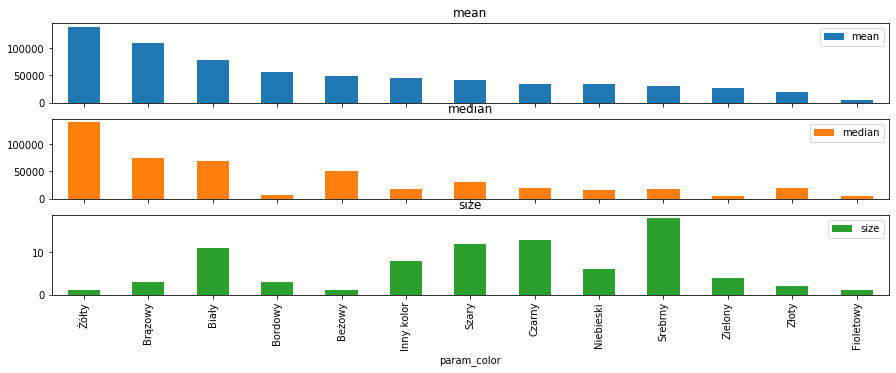

In [19]:
group_and_barplot('param_color', feat_sort='mean');